### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

### Loading Data

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>


1. read the CSV file from the specified path and load it into a DataFrame

2. returns a random sample of 2 rows from the dataFrame `df`
</details>

In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
15657,Machine Learning Engineer,Machine Learning Engineer,Abu Dhabi - United Arab Emirates,via LinkedIn,Full-time,False,United Arab Emirates,2023-04-24 13:25:59,False,False,United Arab Emirates,NaN,NaN,NaN,Alef Education,"['r', 'nosql', 'python', 'scala', 'java', 'cas...","{'cloud': ['aws'], 'databases': ['cassandra'],..."
225457,Data Engineer,Data Engineer,"Derio, Spain",via BeBee,Full-time,False,Spain,2023-10-24 07:40:57,False,False,Spain,NaN,NaN,NaN,TECNALIA,"['python', 'sql', 'c#', 'nosql', 'elasticsearc...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."


##### Data Cleanup

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>

1. Define a list of new column names  

2. Assign the new column names to the DataFrame  

3.  


4.  


5. Convert the 'posted_dt' column from string format to date-time format using `pd.to_datetime()`  

6. Convert 'skills' from string format to list format  

    a. The `apply` method is used to apply a function to each element in the `skills` column  
    
    b. `ast.literal_eval()` evaluates strings containing Python literals (like lists) and converts them into their corresponding Python objects  
    
    c. `pd.notna(gg)` ensures that this conversion only happens if `gg` is not missing or `NaN`
    
7. Remove rows or columns with missing values  

    a. `subset=['salyr']` means that only rows with missing values in the `salyr` column should be dropped  
    
    b. `inplace=True` means that the changes will be applied directly to the DataFrame without creating a new one

</details>


In [3]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

Random sample of 2 rows from the modified dataFrame `df_ind`

In [4]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
200670,Senior Data Scientist,Senior Data Scientist - Insurance Domain,"London, UK",via JobServe,Contractor,False,United Kingdom,2023-05-16 15:21:28,False,False,United Kingdom,NaN,NaN,NaN,L&G Recruitment UK,"[sql, oracle, flow]","{'cloud': ['oracle'], 'other': ['flow'], 'prog..."
536025,Data Analyst,Data Analyst,"Austin, TX",via Indeed,Full-time,False,"Texas, United States",2023-04-27 19:01:04,False,False,United States,NaN,NaN,NaN,"Conquest Tech Solutions, Inc.","[gcp, sheets, power bi, looker, flow]","{'analyst_tools': ['sheets', 'power bi', 'look..."


Filtering Data for India

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>
1. creates a new dataFrame 'df_ind 'that contains only the rows from the original dataFrame 'df' where the 'country' column has the value 'India'. 
    the `.copy()` method copies the filtered data to used for further process, so changes to `df_ind` do not affect `df`.

2. returns a random sample of 2 rows from the dataFrame `df_ind`
</details>

In [5]:
df_ind = df[df['country']== 'India'].copy()
df_ind.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
135172,Data Engineer,Data Engineer,"Noida, Uttar Pradesh, India",via LinkedIn,Full-time,False,India,2023-12-08 08:11:42,False,False,India,NaN,NaN,NaN,InfoStride,"[java, python, snowflake, aws, looker, terrafo...","{'analyst_tools': ['looker'], 'cloud': ['snowf..."
151391,Senior Data Engineer,Senior Data Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-02-15 08:30:38,False,False,India,NaN,NaN,NaN,W. R. Grace,"[sql, python, oracle]","{'cloud': ['oracle'], 'programming': ['sql', '..."


Exploding the 'skills' Column

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>
1. by expanding the lists in the 'skills' column of `df_ind `into separate rows, each skill in a list will be put into its own row, duplicating the other column values for each new row and creates a new dataFrame `df_explode` 

2. returns a random sample of 2 rows from the dataFrame `df_ind`
</details>

In [6]:
df_explode = df_ind.explode('skills')
df_explode.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
784944,Data Engineer,Specialist Data Engineer- Scala Spark,India,via LinkedIn,Full-time,False,India,2023-01-28 06:12:51,False,False,India,NaN,NaN,NaN,LTIMindtree,bitbucket,"{'cloud': ['databricks', 'oracle'], 'libraries..."
693915,Data Scientist,Lead Data Scientist,"Karnataka, India",via Indeed,Full-time,False,India,2023-12-15 10:10:09,False,False,India,NaN,NaN,NaN,Reflections Info Systems,python,"{'libraries': ['pandas', 'numpy', 'matplotlib'..."


Counting Job Occurrences

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>
1.  
   a. `df_ind['job'].value_counts()` = counts the occurrences of each unique value in the 'job' column of `df_ind`  

   
   b. `.reset_index(name='job count')` =  


    i. converts the Series to a DataFrame  

      
    ii. `.reset_index()` turns the index (job titles) into a column, and the counts become a new column named 'job count'

2. outputs the contents of the `df_jobs` 
</details>

In [7]:
df_jobs = df_ind['job'].value_counts().reset_index(name='job count')
df_jobs

,job,job count
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


Aggregating and Sorting Skill Counts by Job


<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>

1. groups the `df_explode` by both 'job' and 'skills', then calculates the count of each skill for each job title
this results in a series with a multiIndex (job and skills) and counts as values

2. converts the series into a dataFrame with 'job', 'skills', and 'skill count' columns,
    where 'skill count' contains the counts of each skill for each job
    
3. sorts the DataFrame in descending order based on 'skill count', so the most common skills appear first

4. 


5. outputs the contents of the `df_jobs` 

</details>


In [8]:
df_skills = df_explode.groupby(['job','skills'])['skills'].agg('size')
df_skills = df_skills.reset_index(name='skill count')
df_skills.sort_values(by='skill count',ascending=False,inplace=True)

df_skills

,job,skills,skill count
637,Data Engineer,sql,12993
603,Data Engineer,python,11568
807,Data Scientist,python,9248
632,Data Engineer,spark,7157
480,Data Engineer,aws,6993
...,...,...,...
1472,Senior Data Scientist,svn,1
998,Machine Learning Engineer,svn,1
138,Business Analyst,twilio,1
835,Data Scientist,solidity,1


Extracting and Sorting Unique Job Titles

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>
1. `df_skills['job'].unique().tolist()` =  extracts the unique job titles from the 'job' column of `df_skills` and converts them to a list


2. `sorted(job_titles[:3])` =  selects the first three job titles from the list and sorts them alphabetically

3. 


4. `job_titles` =  displays the resulting sorted list of job titles
</details>


In [9]:
job_titles = df_skills['job'].unique().tolist()
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Merging Job Counts with Skill Counts

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>
1.  a. merges the `df_skills` and `df_jobs` dataFrames


    b. on the 'job' column using an inner join


    c. the new dataFrame `df_jobs_skills` will contain the job titles along with their skill counts and job counts, including only the job titles that appear in both original dataFrames
</details>

In [10]:
df_jobs_skills = pd.merge(df_skills, df_jobs, on='job', how='inner')

Calculating  Skill Percentages

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>
1.  a. creates a new column 'skill %' in the `df_jobs_skills` , which gives the percentage of each skill relative to the total number of job postings for that job title


    b. the result is rounded to one decimal place.
</details>

In [11]:
df_jobs_skills ['skill %'] = (100*  (df_jobs_skills['skill count']/df_jobs_skills['job count'])).round(1)
df_jobs_skills['skill %']

0       68.2
1       60.7
2       69.6
3       37.5
4       36.7
        ... 
1684     0.0
1685     0.1
1686     0.1
1687     0.0
1688     0.1
Name: skill %, Length: 1689, dtype: float64

Plotting Top Skills by Job Title

<details>
<summary>Click to toggle for ' Line to Line Approach '</summary>

<span style="color:gray; font-size:25px;"> Setting Up for Plot</span>

<span style=" font-size:13px;">`sns.set_theme(style='ticks') `</span>
    <span style=" font-size:13px;">  sets the Seaborn theme to 'ticks'</span>

<span style=" font-size:13px;"> `fig, ax = plt.subplots(len(job_titles), 1, figsize=(7, 5))`</span>
    <span style=" font-size:13px;"> Creates a figure and a set of subplots with **len(job_titles)** rows and 1 column. each subplot will have a size of 7x5 inches</span>

<span style="color:gray; font-size:25px;">Create Plot</span>


<span style=" font-size:13px;"> `for i, job_name in enumerate(job_titles) `</span> 
<span style=" font-size:13px;">  loops over each job title in the **job_titles** list, with **i** as the index and **job_name** as the job title</span> 

- <span style=" font-size:13px;">`df_plt = df_jobs_skills[df_jobs_skills['job'] == job_name].head(5)`</span>
<span style=" font-size:13px;">Filters **df_jobs_skills** for rows where the 'job' column matches **job_name**, and selects the top 5 rows </span>

- <span style=" font-size:13px;">`sns.barplot(data=df_plt, x='skill %', y='skills', ax=ax[i], hue='skill count', palette='dark:b_r')`</span>
<span style=" font-size:13px;">creates a bar plot on subplot **ax[i]** with 'skill %' on the x-axis and 'skills' on the y-axis, using the 'skill count' as the hue and applying the 'dark:b_r' color palette</span>

<span style="color:gray; font-size:25px;">Modify Axes and Labels</span>


<span style=" font-size:13px;">`ax[i].set_title(job_name)`</span> <span style=" font-size:13px;">Sets the title of the subplot **ax[i]** to the current job title</span>

<span style=" font-size:13px;">`ax[i].set_ylabel('')`</span> <span style=" font-size:13px;">Removes the y-axis label from subplot **ax[i]**</span>

<span style=" font-size:13px;">`ax[i].set_xlabel('')`</span> <span style=" font-size:13px;">Removes the x-axis label from subplot **ax[i]**</span>

<span style=" font-size:13px;">`ax[i].get_legend().remove()`</span> <span style=" font-size:13px;">Removes the legend from subplot **ax[i]**</span>

<span style=" font-size:13px;">`ax[i].set_xlim(0, 100)`</span>
<span style=" font-size:13px;">Sets the x-axis limits of subplot **ax[i]** from 0 to 100</span>

- <span style="color:gray; font-size:18px;"> remove the x-axis tick labels for better readability</span>


    - <span style=" font-size:13px;">`if i != len(job_titles) - 1`</span> <span style=" font-size:13px;"> Checks if the current subplot is not the last one in the list</span>

        - <span style=" font-size:13px;">`ax[i].set_xticks([])`</span> <span style=" font-size:13px;"> Removes the x-axis tick labels from subplot **ax[i]** if it is not the last subplot</span>

-  <span style="color:gray; font-size:18px;">  label the percentage on the bars </span>
    - <span style=" font-size:13px;">`for p, q in enumerate(df_plt['skill %'])`</span> <span style=" font-size:13px;">Loops over the skill percentages **q** in **df_plt**, with **p** as the index for each bar</span>

        - <span style=" font-size:13px;">`ax[i].text(q + 1, p, f'{q:.0f}%', va='center')`</span> <span style=" font-size:13px;">Adds text labels to the bars in subplot **ax[i]**, positioning them slightly to the right of the bar with the percentage value formatted as an integer</span>

<span style="color:gray; font-size:25px;">Modify the entire figure</span>


<span style=" font-size:13px;">`plt.suptitle('Frequency of Skill Requests in Indian Job Postings')`
<span style=" font-size:13px;">Sets the title of the entire figure to 'Frequency of Skill Requests in Indian Job Postings'</span>

<span style="color:gray; font-size:25px;">Display the plot</span>


<span style=" font-size:13px;">`plt.tight_layout()`</span>
<span style=" font-size:13px;">Adjusts subplot parameters to give some padding and prevent overlapping of plot elements</span>

<span style=" font-size:13px;">`plt.show()`</span>
<span style=" font-size:13px;">Displays the plot</span>

</details>


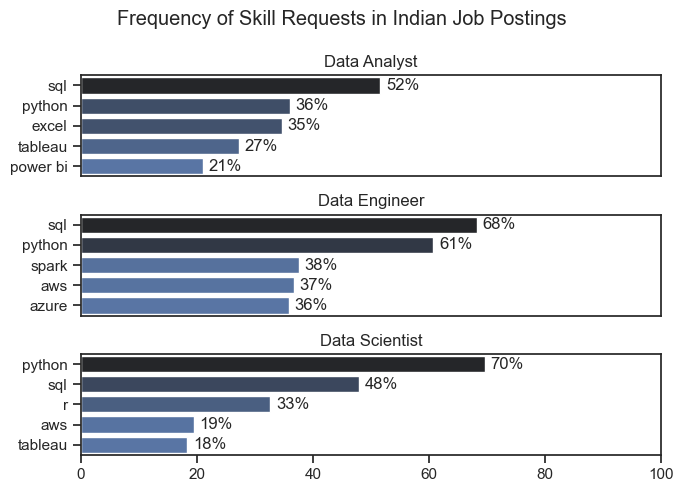

In [12]:
# Setting Up for Plot
sns.set_theme(style='ticks') 
fig,ax = plt.subplots(len(job_titles),1, figsize = (7,5))

# Create Plot
for i,job_name in enumerate(job_titles):
    df_plt = df_jobs_skills[df_jobs_skills['job']==job_name].head(5)
    sns.barplot(data= df_plt, x= 'skill %', y='skills', ax=ax[i], hue='skill count', palette='dark:b_r')

    # Modify Axes and Labels
    ax[i].set_title(job_name)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 100)

    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for p,q in enumerate (df_plt['skill %']):
        ax[i].text(q +1 , p, f'{q:.0f}%', va = 'center')

# Modify the entire figure
plt.suptitle('Frequency of Skill Requests in Indian Job Postings')

# Display the plot
plt.tight_layout()
plt.show()

`End`
---

---